# **Backgammon MCTS/NN** 

## Resources:
[Rules of Backgammon](https://www.fgbradleys.com/rules/Backgammon_Rules.pdf)

[Covers the way of calculating nodes for MCTS in a game of chance](https://arxiv.org/pdf/0909.0801.pdf) (Chapter 4)

[Brief summary of TD-Gammon](http://satirist.org/learn-game/systems/gammon/td-gammon.html)


In [1]:
from pMCTS import *
from heuristic import *
from board_display import *
from matplotlib.animation import FuncAnimation

In [2]:
def play():

    board = starting_board() # find the starting board
    first_turn = True # it is the first_turn
    white_turn = True # we assume white starts but this can be changed later
    while not game_over(board): # while the game isn't over keep playing
        # White turn (AI)
        rolls = roll(first_turn) # find the rolls
        first_turn = False # it can't be the first roll after a roll
        print_rolls(rolls) # print the rolls
        print(BoardPrinter(board)) # print the board

        if white_turn: # computer_turn
            legal_moves = full_step(board, rolls)
            if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":  # there are legal moves
                print("Thinking...")
                best_move = pUCT(board, rolls, legal_moves, 5) # finds the best move
                board = best_move[0] # the board is the best move according to the computer
                print(best_move[1])
                print()
            else: # if they're no moves, then it gets skipped
                print("White has no legal moves; skipping turn...")
                board[WHITE_TURN] = not board[WHITE_TURN]

        else: # human_turn

            legal_moves = full_step(board, rolls) # find all the moves they can do
            if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":
                best_move = get_player_move(board, rolls, legal_moves) # get the player and modifies the board likewise
                board = best_move[0]
            else:
                print("Black has no legal moves; skipping turn...")
                board[WHITE_TURN] = not board[WHITE_TURN]

        white_turn = not white_turn # change the turn

    winner = find_winner(board) # find the winner of the board since the game is over
    if winner == 'White': # print the respective winner
        print("White won!")
    elif winner == "Black":
        print("Black won!")

In [3]:
# Run this to play a game against our AI!
play()

Dice rolls are 3 1 
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 
 X         O   O          X  O           X     X              O
 X         O   O          X  O           X     X              O
           O   O          X  O           X     X               
           O              X  O                 X               
           O              X  O                 X               
White pieces beared off: 0
Black pieces beared off: 0
White pieces out: 0
Black pieces out: 0

Thinking...
Move piece 3 steps from position 17 to position 20. Then Move piece 1 steps from position 19 to position 20.

Dice rolls are 4 4 4 4 
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 
 X         O   O          X  O           X     X  X           O
 X         O   O          X  O           X     X  X           O
           O   O          X  O                 X               
           O              X  O                 X               
           O              X  O   

KeyboardInterrupt: 

#Data collection and training for NN

MCTS complex Heuristic:  
T=100,m=25: 94% on 50 games  
T =250, m=25: 96% on 100 games

Only complex heuristic:

N = 500: 95%

MCTS Vs Heuristic:

N= 100, 55% of the times MCTS won


In [3]:
def player_chooser(player, board, rolls, legal_moves, depth, white_turn):

    if player == 'MCTS':

        return pUCT(board, rolls, legal_moves, depth) 

    if player == 'Heuristic':

        return bestmove(legal_moves, white_turn)

    if player == 'Random':

        return random.choice(legal_moves)

In [4]:
def play_enhanced(player1, player2, depth): # plays a game between AIs of your choice
    
    board = starting_board() # find the starting board
    first_turn = True # it is the first_turn
    white_turn = True # we assume white starts but this can be changed later
    while not game_over(board): # while the game isn't over keep playing

        # White turn (AI one)
        rolls = roll(first_turn) # find the rolls
        first_turn = False # it can't be the first roll after a roll
        if white_turn: # computer_turn
          legal_moves = full_step(board, rolls)
          if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":   # (list is non-empty)

              best_move = player_chooser(player1, board, rolls, legal_moves, depth, True)
              board = best_move[0] # the board is the best move according to the computer
          else: # if they're no moves, then it gets skipped

              board[WHITE_TURN] = not board[WHITE_TURN]

        #Black turn(AI two) --- similar code as the white turn
        else: 

          legal_moves = full_step(board, rolls) # find all the moves they can do
          if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":  

              best_move = player_chooser(player2, board, rolls, legal_moves, depth, False) 
              board = best_move[0] 

          else: 

              board[WHITE_TURN] = not board[WHITE_TURN]


        white_turn = not white_turn # change the turn

    winner = find_winner(board) # find the winner of the board since the game is over
    if winner == 'White': # print the respective winner
        return 1
    elif winner == "Black":
        return 0

# The following piece of code is only here for one to play the game many times to see which AI wins more 

wins = 0 
GAMES = 100
for i in range(GAMES):

    wins += play_enhanced('Heuristic', 'Heuristic', 5)
    print(i+1)
    print(wins/(i+1))

print(wins/GAMES)

1
1.0
2
0.5
3
0.3333333333333333
4
0.5
5
0.4
6
0.3333333333333333
7
0.2857142857142857
8
0.25


KeyboardInterrupt: 

In [5]:
# The following play function is different from the above enhanced_play in that it also returns all the boards visited during the game for training the NN

def data_play(player1, player2, depth): # plays a game between AIs of your choice and returns all the boards of your choice

    boards = []
    all_rolls = []
    board = starting_board() # find the starting board
    boards.append(board)
    first_turn = True # it is the first_turn
    white_turn = True # we assume white starts but this can be changed later
    while not game_over(board): # while the game isn't over keep playing

        # White turn (AI one)
        rolls = roll(first_turn) # find the rolls
        all_rolls.append(rolls)
        first_turn = False # it can't be the first roll after a roll
        if white_turn: # computer_turn
            legal_moves = full_step(board, rolls)
            if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":   # (list is non-empty)

                best_move = player_chooser(player1, board, rolls, legal_moves, depth, True)
                board = best_move[0] # the board is the best move according to the computer
            else: # if they're no moves, then it gets skipped

                board[WHITE_TURN] = not board[WHITE_TURN]

        #Black turn(AI two) --- similar code as the white turn
        else:

            legal_moves = full_step(board, rolls) # find all the moves they can do
            if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":

                best_move = player_chooser(player2, board, rolls, legal_moves, depth, False)
                board = best_move[0]

            else:

                board[WHITE_TURN] = not board[WHITE_TURN]

        boards.append(board)
        white_turn = not white_turn # change the turn

    winner = find_winner(board) # find the winner of the board since the game is over
    if winner == 'White': # print the respective winner
        return boards, all_rolls
    elif winner == "Black":
        return boards, all_rolls

In [6]:
boards, rolls = data_play("MCTS","MCTS", 60)

In [7]:
boards = [starting_board()] + boards

In [9]:
len(boards), len(rolls)

(56, 54)

In [12]:
boards = boards[1:]

In [13]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from time import sleep

def display_backgammon_board(board, ax, white_roll, black_roll):
    """
    Updates the backgammon board on the given Matplotlib axis, showing rolls and 'out' pieces.
    """
    ax.clear()  # Clear the axis for redrawing
    ax.axis('off')

    # Draw triangles for points
    for i in range(12):
        # Top triangles
        color = "tan" if i % 2 == 0 else "saddlebrown"
        ax.fill_between([i, i + 1], [6, 6], [12, 12], color=color)
        # Bottom triangles
        color = "saddlebrown" if i % 2 == 0 else "tan"
        ax.fill_between([i, i + 1], [6, 6], [0, 0], color=color)

    # Draw pieces
    for i, count in enumerate(board[BOARD_SPLICE]):  # Main points on the board
        x = i % 12 + 0.5  # Center of the triangle
        top = i < 12
        if top:
            x = 12 - x
        y_start = 11.5 if top else 0.5
        dy = -0.6 if top else 0.6

        for j in range(abs(count)):
            y = y_start + j * dy
            color = "white" if count < 0 else "black"
            edge_color = "black" if count < 0 else "white"
            ax.add_patch(plt.Circle((x, y), 0.25, color=color, ec=edge_color, lw=1))

    # Show "out" and "bearing off" counts in the center
    ax.text(1.5, 6.5, f"White Out: {board[WHITE_OUT]}", fontsize=10, ha="center", va="center", color="white", bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(1.5, 5.5, f"Black Out: {board[BLACK_OUT]}", fontsize=10, ha="center", va="center", color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(10.5, 6.5, f"W. Bearing: {board[WHITE_BEARING]}", fontsize=10, ha="center", va="center", color="white", bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(10.5, 5.5, f"B. Bearing: {board[BLACK_BEARING]}", fontsize=10, ha="center", va="center", color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.5"))

    # Show dice rolls
    ax.text(6, 6.5, f"White Roll: {white_roll}", fontsize=12, ha="center", va="center", color="white", bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(6, 5.5, f"Black Roll: {black_roll}", fontsize=12, ha="center", va="center", color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.5"))


def main():
    fig, ax = plt.subplots(figsize=(12, 6))

    for turn in range(30):  # Simulate 10 turns
        white_roll = ""
        black_roll = ""
        if turn % 2 == 0:
            white_roll = " ".join(map(str, rolls[turn]))
        else:
            black_roll = " ".join(map(str, rolls[turn]))

        disp_board = boards[turn][:-1]

        display_backgammon_board(disp_board, ax, white_roll, black_roll)
        display(fig)  # Display the updated figure
        clear_output(wait=True)  # Clear the previous output to update animation
        sleep(3)  # Pause to simulate time between turns

    plt.close(fig)  # Close the figure to prevent resource leakage


# main()

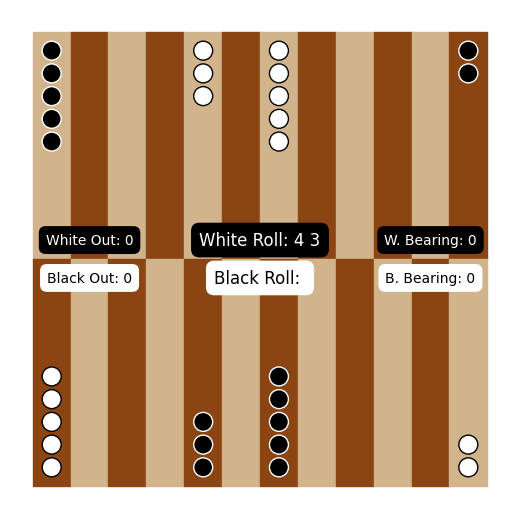

In [20]:
def update_frame(turn, boards, rolls, ax):

    white_roll = ""
    black_roll = ""
    if turn % 2 == 0:
        white_roll = " ".join(map(str, rolls[turn]))
    else:
        black_roll = " ".join(map(str, rolls[turn]))

    disp_board = boards[turn][:-1]

    display_backgammon_board(disp_board, ax, white_roll, black_roll)
    

fig, ax = plt.subplots(figsize=(12, 6))
fig.set_size_inches(5,5)
ax.set_axis_off() # You don't actually need this line as the saved figure will not include the labels, ticks, etc, but I like to include it
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
num_turns = len(boards)
# num_turns = 30
# rolls.append(rolls[0])

ani = FuncAnimation(
    fig,
    update_frame,
    frames=num_turns,
    fargs=(boards, rolls, ax),
    interval=1000,
    repeat=False
)

# Save as video
# ani.save("backgammon_animation.mp4", writer="ffmpeg", fps=1)

# Save as GIF
ani.save('images/backgammon_animation_full_game.gif', dpi=100, writer='pillow', fps=1)